In [75]:
#PRE-PROCESSING COMPLETE STEPS
'''
3.  Data Pre-processing: After getting the right data (step 2),
making sure that the data is ready for the analysis:
handle missing values, outliers, inconsistencies,
handling text data, transforming the data in the suitable format,
feature engineering (engineering of input data:
you might have to add new column, drop columns that are not
relevant or have duplicate impact, etc)

Library: scikit-learn - is a powerful Machine learning library
it has lot of features, easy to use - within couple of lines code
you have achieve very powerful implementation

This way you install scikit-learn (use it like sklearn)

pip install scikit-learn

Dataset for all our ML work:  https://github.com/swapnilsaurav/MachineLearning
Today's session: 1_Data_PreProcessing.csv

'''

import pandas as pd

In [77]:
dataset=pd.read_csv(r"C:\Users\DELL\Desktop\DATA SCIENCE\Assignment\1_Data_PreProcessing.csv")

In [79]:
dataset.head()

,Region,Salesperson,Quotation,Win
0,North,44.0,72000.0,No
1,South,27.0,48000.0,Yes
2,East,30.0,54000.0,No
3,South,38.0,61000.0,No
4,East,40.0,NaN,Yes


In [81]:
'''
Features (input): Region, Salesperson, Quotation
Target (output): Win 
Objective: to predict if a deal will be won or not by the team 
    based on Region, Salesperson and Quotation

Dataset: We have the data in the above csv file
    We divide into X (input cols) and y (target col)
'''
X = dataset.iloc[:,:3].values
y = dataset.iloc[:, 3].values
print("1.  X : ",X)
print("1.  y : ",y)



1.  X :  [['North' 44.0 72000.0]
 ['South' 27.0 48000.0]
 ['East' 30.0 54000.0]
 ['South' 38.0 61000.0]
 ['East' 40.0 nan]
 ['North' 35.0 58000.0]
 ['North' nan 52000.0]
 ['West' 48.0 79000.0]
 ['West' 50.0 83000.0]
 ['West' 37.0 67000.0]
 ['North' 44.0 72000.0]
 ['South' 27.0 48000.0]
 ['East' 30.0 54000.0]
 ['South' 38.0 61000.0]]
1.  y :  ['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'Yes'
 'No']


In [83]:
'''
Preprocessing:
    1. Handle missing values in the columns: Salesperson, Quotation
    2. Handling of categorical data: Region
    3. Dividing into Train and Test data
    4. Scaling (Normalization): (X-Mean)/Std Dev : Z normalization or standard scaling

# lets create an object of class SimpleImputer
#missing values will indicate which values to replace

sklearn class to execute or perform, we need to follow two steps process:
1. fit() - is to train (understand what needs to be done)
2. transform() - actually perform (you will see it happening)
Sometimes, we can club both steps as one by using: fit_transform()
'''
# fill Nan Value

from sklearn.impute import SimpleImputer
import numpy as np

imputer=SimpleImputer(missing_values=np.nan, strategy="mean")
imputer = imputer.fit(X[:,1:3])
X[:,1:3] = imputer.transform(X[:,1:3])
print("2.  X after imputer: ",X)


2.  X after imputer:  [['North' 44.0 72000.0]
 ['South' 27.0 48000.0]
 ['East' 30.0 54000.0]
 ['South' 38.0 61000.0]
 ['East' 40.0 62230.769230769234]
 ['North' 35.0 58000.0]
 ['North' 37.53846153846154 52000.0]
 ['West' 48.0 79000.0]
 ['West' 50.0 83000.0]
 ['West' 37.0 67000.0]
 ['North' 44.0 72000.0]
 ['South' 27.0 48000.0]
 ['East' 30.0 54000.0]
 ['South' 38.0 61000.0]]


In [85]:
#in Machine learning not accepted categorical data so we convert into numerical,we used OneHotEncoder instead south,north,east
# 2. handling of categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lc_x = LabelEncoder()
X[:,0] = lc_x.fit_transform(X[:,0])
print("3.  X after Label Encoder: \n",X)


3.  X after Label Encoder: 
 [[1 44.0 72000.0]
 [2 27.0 48000.0]
 [0 30.0 54000.0]
 [2 38.0 61000.0]
 [0 40.0 62230.769230769234]
 [1 35.0 58000.0]
 [1 37.53846153846154 52000.0]
 [3 48.0 79000.0]
 [3 50.0 83000.0]
 [3 37.0 67000.0]
 [1 44.0 72000.0]
 [2 27.0 48000.0]
 [0 30.0 54000.0]
 [2 38.0 61000.0]]


In [87]:
#column tranform
from sklearn.compose import ColumnTransformer
transfomer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = transfomer.fit_transform(X)
# drop any one column
X = X[:,1:]
print("4.  X after Column Transform and OneHotEncoder: \n",X)


4.  X after Column Transform and OneHotEncoder: 
 [[1.0 0.0 0.0 44.0 72000.0]
 [0.0 1.0 0.0 27.0 48000.0]
 [0.0 0.0 0.0 30.0 54000.0]
 [0.0 1.0 0.0 38.0 61000.0]
 [0.0 0.0 0.0 40.0 62230.769230769234]
 [1.0 0.0 0.0 35.0 58000.0]
 [1.0 0.0 0.0 37.53846153846154 52000.0]
 [0.0 0.0 1.0 48.0 79000.0]
 [0.0 0.0 1.0 50.0 83000.0]
 [0.0 0.0 1.0 37.0 67000.0]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 1.0 0.0 27.0 48000.0]
 [0.0 0.0 0.0 30.0 54000.0]
 [0.0 1.0 0.0 38.0 61000.0]]


In [89]:
# Scaling
'''
Scaling (Normalization): (X-Mean)/Std Dev : Z normalization or standard scaling
Salesperson	Quotation	Sales_Scalar	Q_Scalar
44.0	72000.0	0.915612429 	0.916032516
27	48000	-1.493320271    	-1.334378075
30	54000	-1.0682145  	-0.771775427
38	61000	0.065400888	-0.115405671
40	62230.769230769234	0.348804735	-1.97851E-14
35	58000	-0.359704883    	-0.396706995
37.53846153846154	52000	-2.03384E-13    	-0.959309643
48	79000	1.482420123	1.572402272
50	83000	1.76582397  	1.947470703
37	67000	-0.076301036    	0.447196976
44	72000	0.915612429	0.916032516
27	48000	-1.493320271    	-1.334378075
30	54000	-1.0682145  	-0.771775427
38	61000	0.065400888	-0.115405671
37.53846153846154	62230.769230769234	Mean	
7.057067224	10664.72052	Std Dev	
'''
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:,3:5] = sc.fit_transform(X[:,3:5])
print("5.  X after Standard Scaling: \n",X)


5.  X after Standard Scaling: 
 [[1.0 0.0 0.0 0.9156124288690699 0.916032516027634]
 [0.0 1.0 0.0 -1.4933202708936026 -1.334378074528444]
 [0.0 0.0 0.0 -1.0682145003472487 -0.7717754268894245]
 [0.0 1.0 0.0 0.06540088777636192 -0.11540567131056842]
 [0.0 0.0 0.0 0.3488047348072646 0.0]
 [1.0 0.0 0.0 -0.3597048827699921 -0.3967069951300782]
 [1.0 0.0 0.0 0.0 -0.9593096427690977]
 [0.0 0.0 1.0 1.482420122930875 1.57240227160649]
 [0.0 0.0 1.0 1.765823969961778 1.9474707033658365]
 [0.0 0.0 1.0 -0.0763010357390894 0.44719697632845107]
 [1.0 0.0 0.0 0.9156124288690699 0.916032516027634]
 [0.0 1.0 0.0 -1.4933202708936026 -1.334378074528444]
 [0.0 0.0 0.0 -1.0682145003472487 -0.7717754268894245]
 [0.0 1.0 0.0 0.06540088777636192 -0.11540567131056842]]


In [113]:
# Dividing into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=1)
print("X_train: \n",X_train)
print("X_test: \n",X_test)
print("y_train: \n",y_train)
print("y_test: \n",y_test)


X_train: 
 [[1.0 0.0 0.0 0.9156124288690699 0.916032516027634]
 [0.0 0.0 0.0 0.3488047348072646 0.0]
 [0.0 1.0 0.0 -1.4933202708936026 -1.334378074528444]
 [0.0 0.0 0.0 -1.0682145003472487 -0.7717754268894245]
 [1.0 0.0 0.0 0.9156124288690699 0.916032516027634]
 [0.0 1.0 0.0 0.06540088777636192 -0.11540567131056842]
 [0.0 0.0 1.0 -0.0763010357390894 0.44719697632845107]
 [0.0 0.0 1.0 1.765823969961778 1.9474707033658365]
 [0.0 1.0 0.0 -1.4933202708936026 -1.334378074528444]
 [1.0 0.0 0.0 -0.3597048827699921 -0.3967069951300782]]
X_test: 
 [[0.0 1.0 0.0 0.06540088777636192 -0.11540567131056842]
 [0.0 0.0 1.0 1.482420122930875 1.57240227160649]
 [1.0 0.0 0.0 0.0 -0.9593096427690977]
 [0.0 0.0 0.0 -1.0682145003472487 -0.7717754268894245]]
y_train: 
 ['Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes']
y_test: 
 ['No' 'Yes' 'No' 'No']


In [115]:
#LINEAR REGRESSION

link = "https://raw.githubusercontent.com/swapnilsaurav/MachineLearning/refs/heads/master/2_Marks_Data.csv"
# Prediction of marks based on hours of study
import  pandas as pd
data = pd.read_csv(link)
print(data)


    Hours  Marks  Unnamed: 2
0     1.1     32         NaN
1     1.3     37         NaN
2     1.5     30         NaN
3     2.0     35         NaN
4     2.2     32         NaN
5     2.9     45         NaN
6     3.0     48         NaN
7     3.2     44         NaN
8     3.2     52         NaN
9     3.7     46         NaN
10    3.9     51         NaN
11    4.0     45         NaN
12    4.0     46         NaN
13    4.1     46         NaN
14    4.5     49         NaN
15    4.9     54         NaN
16    5.1     53         NaN
17    5.3     67         NaN
18    5.9     65         NaN
19    6.0     75         NaN
20    6.8     73         NaN
21    7.1     79         NaN
22    7.9     81         NaN
23    8.2     91         NaN
24    8.7     88         NaN
25    9.0     85         NaN
26    9.5     94         NaN
27    9.6     90         NaN
28   10.3     98         NaN
29   10.5     98         NaN


In [117]:
X = data.iloc[:, :1].values
y = data.iloc[:, 1].values
print("1.  X : ",X)
print("1.  y : ",y)


1.  X :  [[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
1.  y :  [32 37 30 35 32 45 48 44 52 46 51 45 46 46 49 54 53 67 65 75 73 79 81 91
 88 85 94 90 98 98]


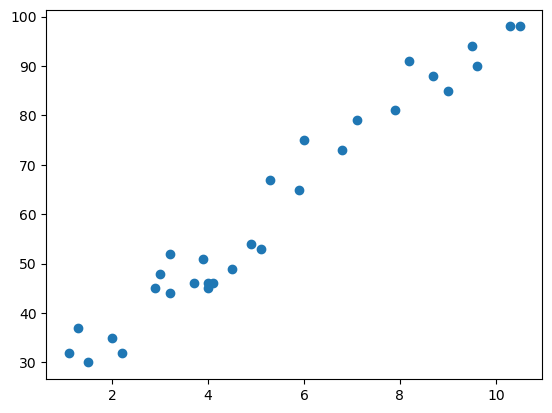

In [119]:
# EDA - to understand the data
import matplotlib.pyplot as plt
plt.scatter(data['Hours'], data['Marks'])
plt.show()

In [121]:
# Dividing into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=1)
print("X_train: \n",X_train)
print("X_test: \n",X_test)
print("y_train: \n",y_train)
print("y_test: \n",y_test)


X_train: 
 [[ 8.7]
 [ 7.9]
 [ 8.2]
 [ 2.2]
 [ 1.5]
 [ 9. ]
 [ 3. ]
 [ 5.9]
 [ 4.1]
 [ 3.2]
 [ 9.6]
 [ 1.3]
 [ 5.1]
 [ 1.1]
 [ 4.9]
 [10.5]
 [10.3]
 [ 3.7]
 [ 3.2]
 [ 4. ]
 [ 4. ]
 [ 2.9]]
X_test: 
 [[5.3]
 [7.1]
 [3.9]
 [6. ]
 [4.5]
 [6.8]
 [9.5]
 [2. ]]
y_train: 
 [88 81 91 32 30 85 48 65 46 44 90 37 53 32 54 98 98 46 52 46 45 45]
y_test: 
 [67 79 51 75 49 73 94 35]


In [123]:

# Run the regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# equation of the best fit line;
m = regressor.coef_
c = regressor.intercept_
print("Coefficient/Slope : ",m)
print("Intercept/Constant : ",c)
print(f"Equation of the best fit line: {m}x + {c} ")
# 7.42 x + 20.8


Coefficient/Slope :  [7.41776533]
Intercept/Constant :  20.824973764134356
Equation of the best fit line: [7.41776533]x + 20.824973764134356 


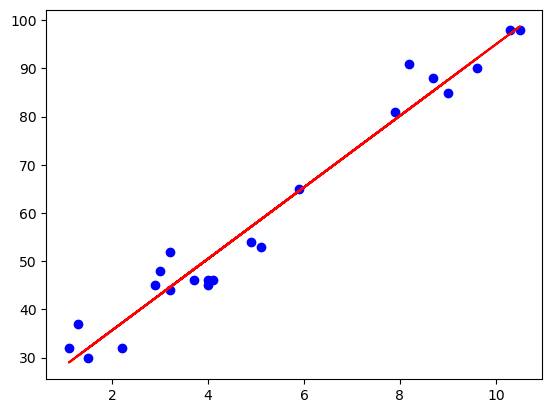

In [125]:
# to see the best fit line
import matplotlib.pyplot as plt
# taking entire data
plt.scatter(X_train, y_train, color="blue")
# regression line on the training data
plt.plot(X_train, m*X_train+c, color="red")
plt.show()


In [131]:

## Predict the outcome for the test data
y_pred = regressor.predict(X_test)
out_df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print("Predicted v Actual - Linear Regression Model \n",out_df)


Predicted v Actual - Linear Regression Model 
    Actual  Predicted
0      67  60.139130
1      79  73.491108
2      51  49.754259
3      75  65.331566
4      49  54.204918
5      73  71.265778
6      94  91.293744
7      35  35.660504


In [133]:
# Model Evaluation:
# Regression metric: Mean Absolute Error (MAE), Mean Squared Error (MSE)
#     Root Mean Squared Error (RMSE), R Square value
#     (compares how well we have done wrt to average)
from sklearn import metrics
print("============  VALIDATION ERROR / TEST ERROR  =============")
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print("MAE = ",mae)
print("MSE = ",mse)
print("RMSE = ",mse**0.5)
print("R Square Score = ",r2)


============  VALIDATION ERROR / TEST ERROR  =============
MAE =  4.198729732359419
MSE =  26.28858816666368
RMSE =  5.127239819499735
R Square Score =  0.9177155747705543


In [135]:
print("============     TRAINING ERROR    =============")
y_pred = regressor.predict(X_train)
mae = metrics.mean_absolute_error(y_train, y_pred)
mse = metrics.mean_squared_error(y_train, y_pred)
r2 = metrics.r2_score(y_train, y_pred)
print("MAE = ",mae)
print("MSE = ",mse)
print("RMSE = ",mse**0.5)
print("R Square Score = ",r2)


============     TRAINING ERROR    =============
MAE =  3.574325686128699
MSE =  18.318432330420915
RMSE =  4.280003776916665
R Square Score =  0.9640144441597381


In [137]:
#MULTIPLE LINEAR REGRESSION
link="https://raw.githubusercontent.com/swapnilsaurav/MachineLearning/refs/heads/master/3_Startups.csv"
import pandas as pd
data = pd.read_csv(link)
print(data)


    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [139]:

X = data.iloc[:, :4].values
y = data.iloc[:, 4].values
print("1.  X : ",X)
print("1.  y : ",y)


1.  X :  [[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida'

In [141]:
# 1. handling of categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lc_x = LabelEncoder()
X[:,3] = lc_x.fit_transform(X[:,3])
print("3.  X after Label Encoder: \n",X)

3.  X after Label Encoder: 
 [[165349.2 136897.8 471784.1 2]
 [162597.7 151377.59 443898.53 0]
 [153441.51 101145.55 407934.54 1]
 [144372.41 118671.85 383199.62 2]
 [142107.34 91391.77 366168.42 1]
 [131876.9 99814.71 362861.36 2]
 [134615.46 147198.87 127716.82 0]
 [130298.13 145530.06 323876.68 1]
 [120542.52 148718.95 311613.29 2]
 [123334.88 108679.17 304981.62 0]
 [101913.08 110594.11 229160.95 1]
 [100671.96 91790.61 249744.55 0]
 [93863.75 127320.38 249839.44 1]
 [91992.39 135495.07 252664.93 0]
 [119943.24 156547.42 256512.92 1]
 [114523.61 122616.84 261776.23 2]
 [78013.11 121597.55 264346.06 0]
 [94657.16 145077.58 282574.31 2]
 [91749.16 114175.79 294919.57 1]
 [86419.7 153514.11 0.0 2]
 [76253.86 113867.3 298664.47 0]
 [78389.47 153773.43 299737.29 2]
 [73994.56 122782.75 303319.26 1]
 [67532.53 105751.03 304768.73 1]
 [77044.01 99281.34 140574.81 2]
 [64664.71 139553.16 137962.62 0]
 [75328.87 144135.98 134050.07 1]
 [72107.6 127864.55 353183.81 2]
 [66051.52 182645.56 11

In [143]:
#column tranform
from sklearn.compose import ColumnTransformer
transfomer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = transfomer.fit_transform(X)
# drop any one column
X = X[:,1:]
print("4.  X after Column Transform and OneHotEncoder: \n",X)

4.  X after Column Transform and OneHotEncoder: 
 [[0.0 1.0 165349.2 136897.8 471784.1]
 [0.0 0.0 162597.7 151377.59 443898.53]
 [1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 1.0 144372.41 118671.85 383199.62]
 [1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 1.0 131876.9 99814.71 362861.36]
 [0.0 0.0 134615.46 147198.87 127716.82]
 [1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 1.0 120542.52 148718.95 311613.29]
 [0.0 0.0 123334.88 108679.17 304981.62]
 [1.0 0.0 101913.08 110594.11 229160.95]
 [0.0 0.0 100671.96 91790.61 249744.55]
 [1.0 0.0 93863.75 127320.38 249839.44]
 [0.0 0.0 91992.39 135495.07 252664.93]
 [1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 1.0 114523.61 122616.84 261776.23]
 [0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 1.0 94657.16 145077.58 282574.31]
 [1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 1.0 86419.7 153514.11 0.0]
 [0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 1.0 78389.47 153773.43 299737.29]
 [1.0 0.0 73994.56 122782.75 303319.26]
 [1.0 0.0 67532.53 105751.03 304

In [145]:
# Dividing into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1)
print("X_train: \n",X_train)
print("X_test: \n",X_test)
print("y_train: \n",y_train)
print("y_test: \n",y_test)

X_train: 
 [[0.0 0.0 63408.86 129219.61 46085.25]
 [0.0 0.0 38558.51 82982.09 174999.3]
 [0.0 1.0 78389.47 153773.43 299737.29]
 [1.0 0.0 28663.76 127056.21 201126.82]
 [0.0 1.0 86419.7 153514.11 0.0]
 [0.0 0.0 23640.93 96189.63 148001.11]
 [0.0 0.0 0.0 116983.8 45173.06]
 [1.0 0.0 75328.87 144135.98 134050.07]
 [1.0 0.0 73994.56 122782.75 303319.26]
 [0.0 0.0 91992.39 135495.07 252664.93]
 [1.0 0.0 27892.92 84710.77 164470.71]
 [0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 1000.23 124153.04 1903.93]
 [0.0 1.0 77044.01 99281.34 140574.81]
 [1.0 0.0 67532.53 105751.03 304768.73]
 [1.0 0.0 142107.34 91391.77 366168.42]
 [1.0 0.0 55493.95 103057.49 214634.81]
 [1.0 0.0 119943.24 156547.42 256512.92]
 [1.0 0.0 61994.48 115641.28 91131.24]
 [1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 66051.52 182645.56 118148.2]
 [0.0 0.0 22177.74 154806.14 28334.72]
 [0.0 0.0 46426.07 157693.92 210797.67]
 [1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 6466

In [147]:
# Run the regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# equation of the best fit line;
m = regressor.coef_
c = regressor.intercept_
print("Coefficient/Slope : ",m)
print("Intercept/Constant : ",c)
print(f"Equation of the best fit line: {m}x + {c} ")

Coefficient/Slope :  [ 5.82738646e+02  2.72794662e+02  7.74342081e-01 -9.44369585e-03
  2.89183133e-02]
Intercept/Constant :  49549.70730376085
Equation of the best fit line: [ 5.82738646e+02  2.72794662e+02  7.74342081e-01 -9.44369585e-03
  2.89183133e-02]x + 49549.70730376085 


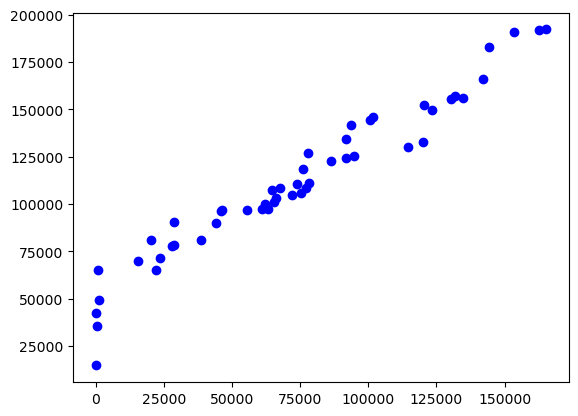

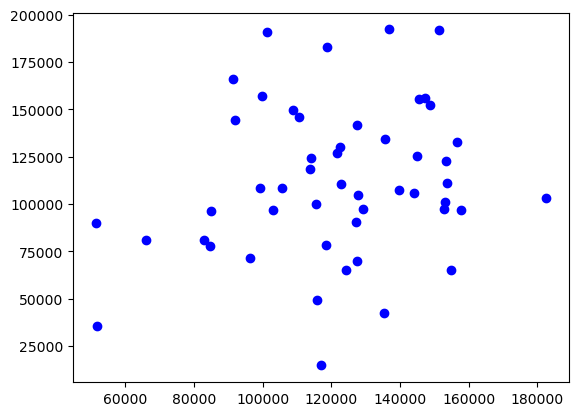

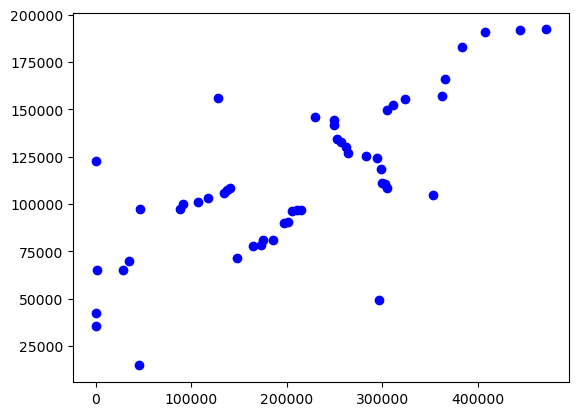

In [149]:

# to see the best fit line
import matplotlib.pyplot as plt
# Profit v R&D
plt.scatter(data['R&D Spend'], data['Profit'], color="blue")
plt.show()
# Profit v Admin
plt.scatter(data['Administration'], data['Profit'], color="blue")
plt.show()
# Profit v Mkt
plt.scatter(data['Marketing Spend'], data['Profit'], color="blue")
plt.show()

In [151]:
## Predict the outcome for the test data
y_pred = regressor.predict(X_test)
out_df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print("Predicted v Actual - Linear Regression Model \n",out_df)


Predicted v Actual - Linear Regression Model 
       Actual      Predicted
0  105008.31  114664.417159
1   96479.51   90593.155316
2   78239.91   75692.841516
3   81229.06   70221.886797
4  191050.39  179790.255149
5  182901.99  171576.920185
6   35673.41   49753.587520
7  101004.64  102276.658889
8   49490.75   58649.377958
9   97483.56   98272.025611


In [153]:
# Model Evaluation:
# Regression metric: Mean Absolute Error (MAE), Mean Squared Error (MSE)
#     Root Mean Squared Error (RMSE), R Square value
#     (compares how well we have done wrt to average)
from sklearn import metrics
print("============  VALIDATION ERROR / TEST ERROR  =============")
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print("MAE = ",mae)
print("MSE = ",mse)
print("RMSE = ",mse**0.5)
print("R Square Score = ",r2)

============  VALIDATION ERROR / TEST ERROR  =============
MAE =  7698.119817483113
MSE =  79495441.50408646
RMSE =  8916.021618641716
R Square Score =  0.9649618042060571


In [155]:
print("============     TRAINING ERROR    =============")
y_pred = regressor.predict(X_train)
mae = metrics.mean_absolute_error(y_train, y_pred)
mse = metrics.mean_squared_error(y_train, y_pred)
r2 = metrics.r2_score(y_train, y_pred)
print("MAE = ",mae)
print("MSE = ",mse)
print("RMSE = ",mse**0.5)
print("R Square Score = ",r2)

============     TRAINING ERROR    =============
MAE =  6198.694762258684
MSE =  80038397.99857989
RMSE =  8946.418165868388
R Square Score =  0.942446542689397


In [157]:
# Analyzing impact of each column on the prediction based on OLS
from statsmodels.api import OLS
import statsmodels.api as sm
import numpy as np
X_ols = sm.add_constant(X)
X_ols = np.array(X_ols, dtype=float)
summ = OLS(y,X_ols).fit().summary()
print("          1.  OLS SUMMARY    ")
print(summ)

          1.  OLS SUMMARY    
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 10 Nov 2025   Prob (F-statistic):           1.34e-27
Time:                        14:15:37   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04 

In [159]:
# Using backward elemination, lets remove X2 (p=0.990)
X_ols = X_ols[:,[0,1,3,4,5]]
X_ols = np.array(X_ols, dtype=float)
summ = OLS(y,X_ols).fit().summary()
print("          2.  OLS SUMMARY    ")
print(summ)

          2.  OLS SUMMARY    
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 10 Nov 2025   Prob (F-statistic):           8.49e-29
Time:                        14:16:02   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04 

In [161]:
# Using backward elemination, lets remove X2 and also X1
X_ols = X_ols[:,[0,2, 3,4]]
X_ols = np.array(X_ols, dtype=float)
summ = OLS(y,X_ols).fit().summary()
print("          3.  OLS SUMMARY    ")
print(summ)

          3.  OLS SUMMARY    
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 10 Nov 2025   Prob (F-statistic):           4.53e-30
Time:                        14:16:18   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04 

In [163]:
# Using backward elemination, lets remove X2, X1, Admin
X_ols = X_ols[:,[0,1, 3]]
X_ols = np.array(X_ols, dtype=float)
summ = OLS(y,X_ols).fit().summary()
print("          4.  OLS SUMMARY    ")
print(summ)


          4.  OLS SUMMARY    
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 10 Nov 2025   Prob (F-statistic):           2.16e-31
Time:                        14:16:33   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04 

In [165]:
#POLYNOMIAL REGRESSION ANALYSIS
link="https://raw.githubusercontent.com/swapnilsaurav/MachineLearning/refs/heads/master/4_Position_Salaries.csv"
import pandas as pd
data = pd.read_csv(link)
print(data)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


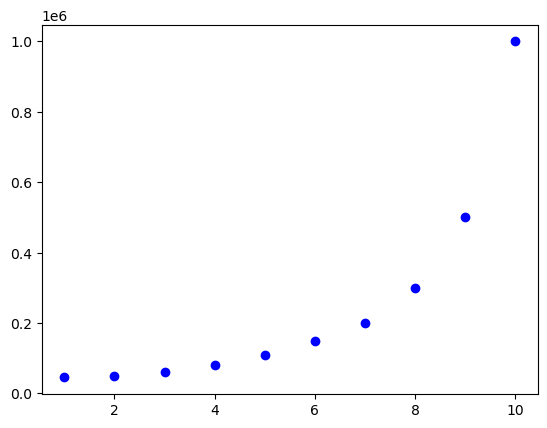

In [167]:
# dataset
X=data.iloc[:,1:2].values
y = data.iloc[:,2].values

# to see the best fit line
import matplotlib.pyplot as plt
# Salary v Level
plt.scatter(data['Level'], data['Salary'], color="blue")
plt.show()


In [171]:
'''
Geometric intuition of Polynomial Regression:
y = C + m1 x1   {Polynomial degree = 1, same as linear regression}
y = C + m1 x1 + m2 X1 ^2 + m3 x1 ^3 + m3 x1 ^4 + ....
 so, based on the EDA, we know if polynomial relation exists or not
 If it exists, still we are not sure of the degree
 Model evaluation will tell us, which is the right degree value
 
'''
# library for polynomial transformation
from sklearn.preprocessing import PolynomialFeatures
# create pipeline - which will aid in polynomial transformation
from sklearn.pipeline import Pipeline

# main model is LinearRegression
from sklearn.linear_model import LinearRegression

for i in range(1,11,2):
    # first lets build with degree 2
    inp = [('polynomial',PolynomialFeatures(degree=i)),
           ('modal',LinearRegression())]

    #execute the pipeline
    pipe = Pipeline(inp)
    pipe.fit(X,y)
    poly_predict = pipe.predict(X)
    ## Predict the outcome for the test data
    out_df = pd.DataFrame({'Actual':y,'Predicted':poly_predict})
    print("Predicted v Actual - Linear Regression Model \n",out_df)
    from sklearn import metrics
    print(f"============  Model Evaluation Degree = {i} =============")
    mae = metrics.mean_absolute_error(y, poly_predict)
    mse = metrics.mean_squared_error(y, poly_predict)
    r2 = metrics.r2_score(y, poly_predict)
    print("MAE = ",mae)
    print("MSE = ",mse)
    print("RMSE = ",mse**0.5)
    print("R Square Score = ",r2)



Predicted v Actual - Linear Regression Model 
     Actual      Predicted
0    45000 -114454.545455
1    50000  -33575.757576
2    60000   47303.030303
3    80000  128181.818182
4   110000  209060.606061
5   150000  289939.393939
6   200000  370818.181818
7   300000  451696.969697
8   500000  532575.757576
9  1000000  613454.545455
============  Model Evaluation Degree = 1 =============
MAE =  128454.54545454544
MSE =  26695878787.878788
RMSE =  163388.73519272613
R Square Score =  0.6690412331929895
Predicted v Actual - Linear Regression Model 
     Actual      Predicted
0    45000   14902.097902
1    50000   78759.906760
2    60000   94960.372960
3    80000   88223.776224
4   110000   83270.396270
5   150000  104820.512821
6   200000  177594.405594
7   300000  326312.354312
8   500000  575694.638695
9  1000000  950461.538462
============  Model Evaluation Degree = 3 =============
MAE =  34790.20979020935
MSE =  1515662004.6620033
RMSE =  38931.504012329184
R Square Score =  0.98120977

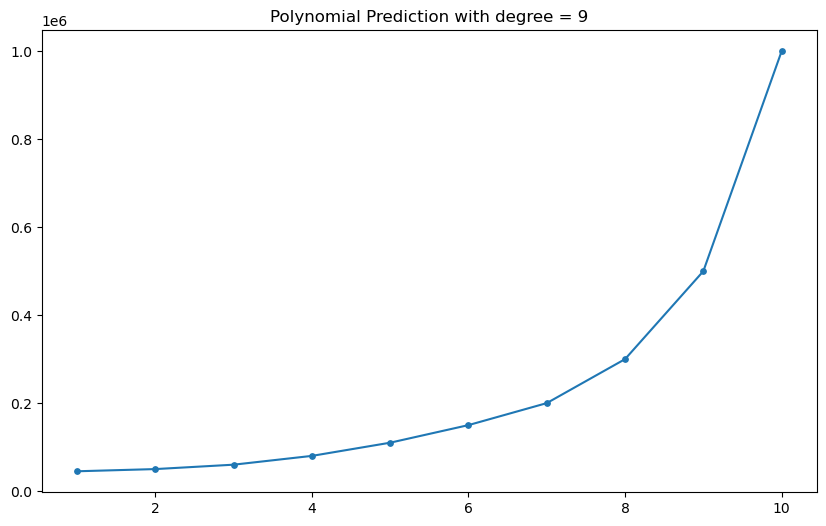

'\nWith more and more training, error decreases BUT WATCH OUT:\nwith more than required training, the model can enter into \nOver-Fitting!\nModel has to understand the pattern and predict: BEST CASE SCENARIO\nTraining Error : Moderate (Accuracy Moderate)\nTest/Validation Error: Moderate (Accuracy Moderate)\nDifference between these 2 errors: will be low\n\nModel doesnt understand the pattern (because of less data): UNDER FITTING\nTraining Error : HIGH (Accuracy low)\nTest/Validation Error: HIGH (Accuracy low)\nDifference between these 2 errors: will be low\n\nModel has too much of training done which makes it bias towards training data:\nOVER FITTING\nTraining Error : Low (Accuracy High)\nTest/Validation Error: HIGH (Accuracy low)\nDifference between these 2 errors: will be high\n\n'

In [173]:
    #plot the prediction
    plt.figure(figsize=(10,6))
    plt.scatter(X,y, s=15)
    plt.plot(X,poly_predict)
    plt.title("Polynomial Prediction with degree = "+str(i))
    plt.show()


'''
With more and more training, error decreases BUT WATCH OUT:
with more than required training, the model can enter into 
Over-Fitting!
Model has to understand the pattern and predict: BEST CASE SCENARIO
    Training Error : Moderate (Accuracy Moderate)
    Test/Validation Error: Moderate (Accuracy Moderate)
    Difference between these 2 errors: will be low
    
Model doesnt understand the pattern (because of less data): UNDER FITTING
    Training Error : HIGH (Accuracy low)
    Test/Validation Error: HIGH (Accuracy low)
    Difference between these 2 errors: will be low
    
Model has too much of training done which makes it bias towards training data:
OVER FITTING
    Training Error : Low (Accuracy High)
    Test/Validation Error: HIGH (Accuracy low)
    Difference between these 2 errors: will be high

'''


In [2]:
#RIDGE & LASSO REGRESSION


link="https://raw.githubusercontent.com/swapnilsaurav/Dataset/refs/heads/master/student_scores_multi.csv"
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv(link)
print(data)

    StudyHrs  PlayHrs  WatchTVHrs  Scores
0        2.5      5.0        12.2      21
1        5.1      8.9         9.7      47
2        3.2      7.4        11.7      27
3        8.5     18.0         5.6      75
4        3.5      6.0        12.2      30
5        4.6      9.9        10.0      45
6        5.5     13.0         7.9      57
7        6.7     14.0         5.8      66
8        6.9     14.0         6.8      90
9        4.1     10.0        10.7      55
10       5.5     10.2         9.5      89
11       5.1     14.0         9.4      45
12       1.5      5.0        13.1      20
13       9.2     16.0         7.0      88
14       5.5     13.0        12.0      60
15       8.3     15.0         0.2      81
16       2.7      6.0         2.0      25
17       7.7     18.1         7.0      85
18       5.9     15.4         9.8      62
19       4.5      6.7        10.6      41
20       3.3      7.0        11.7      42
21       1.1      5.6        10.4      17
22       8.9     18.0         5.7 

In [4]:
X = data.iloc[:,:3].values
y = data.iloc[:,3].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.9, random_state=1)


In [6]:

# run each model

result = {}  # {'Linear - Train': [RMSE, Rsquare], 'Linear - Test': [RMSE, Rsquare]
#model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred_tr = lr.predict(X_train)
rmse = mean_squared_error(y_train, lr_pred_tr) ** 0.5
r2 = r2_score(y_train, lr_pred_tr)
result.update({'Linear - Train': [rmse, r2]})
lr_pred_tr = lr.predict(X_test)
rmse = mean_squared_error(y_test, lr_pred_tr) ** 0.5
r2 = r2_score(y_test, lr_pred_tr)
result.update({'Linear - Test': [rmse, r2]})

In [8]:

'''
LASSO: Linear Equation + alpha * summation(abs value of the coefficient)
LR = m1 x1 + m2 x2 + m3 x3 + c
Lasso = m1 x1 + m2 x2 + m3 x3 + c + alpha * (|m1| + |m2| + |m3|)
We need to find the right alpha value: model improvement

'''
lr = Lasso(alpha=0.2)
lr.fit(X_train, y_train)
lr_pred_tr = lr.predict(X_train)
rmse = mean_squared_error(y_train, lr_pred_tr) ** 0.5
r2 = r2_score(y_train, lr_pred_tr)
result.update({'Lasso - Train': [rmse, r2]})
lr_pred_tr = lr.predict(X_test)
rmse = mean_squared_error(y_test, lr_pred_tr) ** 0.5
r2 = r2_score(y_test, lr_pred_tr)
result.update({'Lasso - Test': [rmse, r2]})


In [10]:
'''
RIDGE: Linear Equation + alpha * summation(squared value of the coefficient)
LR = m1 x1 + m2 x2 + m3 x3 + c
RIDGE = m1 x1 + m2 x2 + m3 x3 + c + alpha * (m1*m1 + m2*m2 + m3*m3)
We need to find the right alpha value: model improvement

'''
lr = Ridge(alpha=0.2)
lr.fit(X_train, y_train)
lr_pred_tr = lr.predict(X_train)
rmse = mean_squared_error(y_train, lr_pred_tr) ** 0.5
r2 = r2_score(y_train, lr_pred_tr)
result.update({'Ridge - Train': [rmse, r2]})
lr_pred_tr = lr.predict(X_test)
rmse = mean_squared_error(y_test, lr_pred_tr) ** 0.5
r2 = r2_score(y_test, lr_pred_tr)
result.update({'Ridge - Test': [rmse, r2]})

In [12]:
'''
ElasticNet: Linear Equation + Lasso + Ridge components
We need to find the right alpha value: model improvement

'''
lr = ElasticNet(alpha=0.2)
lr.fit(X_train, y_train)
lr_pred_tr = lr.predict(X_train)
rmse = mean_squared_error(y_train, lr_pred_tr) ** 0.5
r2 = r2_score(y_train, lr_pred_tr)
result.update({'ElasticNet - Train': [rmse, r2]})
lr_pred_tr = lr.predict(X_test)
rmse = mean_squared_error(y_test, lr_pred_tr) ** 0.5
r2 = r2_score(y_test, lr_pred_tr)
result.update({'ElasticNet - Test': [rmse, r2]})


print("=============================++++=========")
print(" Model              -  RMSE  -  R Square")
print("=============================++++=========")
for k,v in result.items():
    print(k,"\t",v)
print("=============================++++=========")


=============================++++=========
 Model              -  RMSE  -  R Square
=============================++++=========
Linear - Train 	 [4.1023203976182695e-15, 1.0]
Linear - Test 	 [17.58175519148972, 0.4698116067665724]
Lasso - Train 	 [0.525623744532751, 0.9980107816901203]
Lasso - Test 	 [12.33299993904718, 0.7391185393068609]
Ridge - Train 	 [0.6215386720040181, 0.997218565690265]
Ridge - Test 	 [16.88577082972089, 0.5109564443516836]
ElasticNet - Train 	 [1.0888559416294326, 0.9914636277163237]
ElasticNet - Test 	 [16.49994190333793, 0.5330497751601442]
=============================++++=========


In [14]:
#CLASSIFICATION
'''
Classification Models
1. Logistic Regression:

'''
link="https://raw.githubusercontent.com/swapnilsaurav/MachineLearning/refs/heads/master/5_Ads_Success.csv"
import pandas as pd
data = pd.read_csv(link)
print(data)


      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [16]:
X = data.iloc[:, 1:4].values
y = data.iloc[:, 4].values
print("1.  X : ",X)
print("1.  y : ",y)


1.  X :  [['Male' 19 19000]
 ['Male' 35 20000]
 ['Female' 26 43000]
 ...
 ['Female' 50 20000]
 ['Male' 36 33000]
 ['Female' 49 36000]]
1.  y :  [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


In [18]:

# 2. handling of categorical data
from sklearn.preprocessing import LabelEncoder
lc_x = LabelEncoder()
X[:,0] = lc_x.fit_transform(X[:,0])
print("3.  X after Label Encoder: \n",X)


3.  X after Label Encoder: 
 [[1 19 19000]
 [1 35 20000]
 [0 26 43000]
 ...
 [0 50 20000]
 [1 36 33000]
 [0 49 36000]]


In [20]:

# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:,1:3] = sc.fit_transform(X[:,1:3])
print("5.  X after Standard Scaling: \n",X)

5.  X after Standard Scaling: 
 [[1 -1.7817974284598157 -1.4900462352132775]
 [1 -0.25358735848624026 -1.4606813786292843]
 [0 -1.1132055228463764 -0.7852896771974396]
 ...
 [0 1.1791095821139865 -1.4606813786292843]
 [1 -0.15807422911289182 -1.0789382430373722]
 [0 1.083596452740638 -0.9908436732853924]]


In [22]:

# Dividing into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1)
print("X_train: \n",X_train)
print("X_test: \n",X_test)
print("y_train: \n",y_train)
print("y_test: \n",y_test)

X_train: 
 [[0 -0.826666134726331 -1.2257625259573384]
 [0 0.7015439352472443 -1.4019516654612978]
 [1 0.7970570646205928 1.387709710018061]
 [1 -0.5401267466062857 -1.519411091797271]
 [1 -1.4952580403397702 0.33057487299430405]
 [1 -1.2087186522197249 0.5067640124982635]
 [1 0.9880833233672897 -1.0789382430373722]
 [1 -0.25358735848624026 -0.34481682843754075]
 [1 0.8925701939939412 -1.3725868088773046]
 [1 -1.1132055228463764 -1.1083030996213654]
 [0 -0.5401267466062857 1.9162771285299396]
 [1 2.134240875847471 -1.0495733864533787]
 [0 1.3701358408606836 -1.431316522045291]
 [0 0.03295202963380511 -0.4329113981895205]
 [1 -1.2087186522197249 0.5948585822502434]
 [0 1.9432146171007743 -0.9321139601174058]
 [1 1.083596452740638 0.5361288690822568]
 [0 -0.06256109973954335 0.24248030324232428]
 [0 -0.25358735848624026 0.21311544665833101]
 [0 -0.34910048785958875 -0.7852896771974396]
 [1 -1.6862842990864673 -0.60910053769348]
 [1 0.7970570646205928 0.5361288690822568]
 [0 -0.6356398759

In [26]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=1)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

# Model evaluation, we compare y_pred with y_test
# to understand how well the model has performed
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[40  8]
 [ 6 26]]


In [28]:
'''
[[40  8]    TP   FN
 [ 6 26]]   FP   TN

'''
print("Accuracy score: ",accuracy_score(y_test, y_pred))
print("Precision score: ",precision_score(y_test, y_pred))
print("Recall score: ",recall_score(y_test, y_pred))


Accuracy score:  0.825
Precision score:  0.7647058823529411
Recall score:  0.8125


In [1]:
#CLASSIFICATION: K-Nearest Neighbor
'''
Classification Models
1. K Nearest Neighbor:
2. Decision Tree
3. Random Forest
4. ROC Curve and AUC (model evaluation technique)
5. Balanced v Imbalanced dataset

'''
link="https://raw.githubusercontent.com/swapnilsaurav/MachineLearning/refs/heads/master/5_Ads_Success.csv"
import pandas as pd
data = pd.read_csv(link)
print(data)


      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [3]:
X = data.iloc[:, 1:4].values
y = data.iloc[:, 4].values
print("1.  X : ",X)
print("1.  y : ",y)

1.  X :  [['Male' 19 19000]
 ['Male' 35 20000]
 ['Female' 26 43000]
 ...
 ['Female' 50 20000]
 ['Male' 36 33000]
 ['Female' 49 36000]]
1.  y :  [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


In [5]:

# 2. handling of categorical data
from sklearn.preprocessing import LabelEncoder
lc_x = LabelEncoder()
X[:,0] = lc_x.fit_transform(X[:,0])
print("3.  X after Label Encoder: \n",X)

3.  X after Label Encoder: 
 [[1 19 19000]
 [1 35 20000]
 [0 26 43000]
 ...
 [0 50 20000]
 [1 36 33000]
 [0 49 36000]]


In [7]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:,1:3] = sc.fit_transform(X[:,1:3])
print("5.  X after Standard Scaling: \n",X)

5.  X after Standard Scaling: 
 [[1 -1.7817974284598157 -1.4900462352132775]
 [1 -0.25358735848624026 -1.4606813786292843]
 [0 -1.1132055228463764 -0.7852896771974396]
 ...
 [0 1.1791095821139865 -1.4606813786292843]
 [1 -0.15807422911289182 -1.0789382430373722]
 [0 1.083596452740638 -0.9908436732853924]]


In [9]:
# Dividing into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1)
print("X_train: \n",X_train)
print("X_test: \n",X_test)
print("y_train: \n",y_train)
print("y_test: \n",y_test)

X_train: 
 [[0 -0.826666134726331 -1.2257625259573384]
 [0 0.7015439352472443 -1.4019516654612978]
 [1 0.7970570646205928 1.387709710018061]
 [1 -0.5401267466062857 -1.519411091797271]
 [1 -1.4952580403397702 0.33057487299430405]
 [1 -1.2087186522197249 0.5067640124982635]
 [1 0.9880833233672897 -1.0789382430373722]
 [1 -0.25358735848624026 -0.34481682843754075]
 [1 0.8925701939939412 -1.3725868088773046]
 [1 -1.1132055228463764 -1.1083030996213654]
 [0 -0.5401267466062857 1.9162771285299396]
 [1 2.134240875847471 -1.0495733864533787]
 [0 1.3701358408606836 -1.431316522045291]
 [0 0.03295202963380511 -0.4329113981895205]
 [1 -1.2087186522197249 0.5948585822502434]
 [0 1.9432146171007743 -0.9321139601174058]
 [1 1.083596452740638 0.5361288690822568]
 [0 -0.06256109973954335 0.24248030324232428]
 [0 -0.25358735848624026 0.21311544665833101]
 [0 -0.34910048785958875 -0.7852896771974396]
 [1 -1.6862842990864673 -0.60910053769348]
 [1 0.7970570646205928 0.5361288690822568]
 [0 -0.6356398759

In [11]:
accuracy_scores = []

from sklearn.neighbors import KNeighborsClassifier
for i in range(1,56,2):
    classifier = KNeighborsClassifier(n_neighbors=i,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    # to understand how well the model has performed
    from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

[[38 10]
 [ 3 29]]
[[39  9]
 [ 3 29]]
[[39  9]
 [ 3 29]]
[[39  9]
 [ 2 30]]
[[40  8]
 [ 2 30]]
[[40  8]
 [ 2 30]]
[[40  8]
 [ 2 30]]
[[40  8]
 [ 2 30]]
[[41  7]
 [ 2 30]]
[[41  7]
 [ 2 30]]
[[42  6]
 [ 2 30]]
[[41  7]
 [ 3 29]]
[[41  7]
 [ 3 29]]
[[42  6]
 [ 3 29]]
[[41  7]
 [ 3 29]]
[[41  7]
 [ 3 29]]
[[41  7]
 [ 4 28]]
[[41  7]
 [ 4 28]]
[[41  7]
 [ 4 28]]
[[42  6]
 [ 4 28]]
[[42  6]
 [ 4 28]]
[[42  6]
 [ 4 28]]
[[42  6]
 [ 4 28]]
[[42  6]
 [ 4 28]]
[[43  5]
 [ 6 26]]
[[43  5]
 [ 6 26]]
[[43  5]
 [ 6 26]]
[[43  5]
 [ 6 26]]


In [15]:
    print("Number of k =",i)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)
    print("Accuracy score: ",acc)
    print("Precision score: ",precision_score(y_test, y_pred))
    print("Recall score: ",recall_score(y_test, y_pred))

Number of k = 55
Accuracy score:  0.8625
Precision score:  0.8387096774193549
Recall score:  0.8125


In [27]:
#DECISION TREE
accuracy_scores = []

from sklearn.tree import DecisionTreeClassifier
# criteria :
classifier = DecisionTreeClassifier(criterion="entropy", random_state=1)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
# Model evaluation, we compare y_pred with y_test
# to understand how well the model has performed
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[41  7]
 [ 8 24]]


In [29]:
acc = accuracy_score(y_test, y_pred)
accuracy_scores.append(acc)
print("Accuracy score: ",acc)
print("Precision score: ",precision_score(y_test, y_pred))
print("Recall score: ",recall_score(y_test, y_pred))

Accuracy score:  0.8125
Precision score:  0.7741935483870968
Recall score:  0.75


|--- feature_1 <= 0.65
|   |--- feature_2 <= 0.61
|   |   |--- feature_1 <= -0.11
|   |   |   |--- class: 0
|   |   |--- feature_1 >  -0.11
|   |   |   |--- feature_2 <= -0.07
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  -0.07
|   |   |   |   |--- feature_2 <= 0.40
|   |   |   |   |   |--- feature_1 <= 0.27
|   |   |   |   |   |   |--- feature_2 <= 0.02
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_2 >  0.02
|   |   |   |   |   |   |   |--- feature_2 <= 0.29
|   |   |   |   |   |   |   |   |--- feature_2 <= 0.23
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 0.08
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_1 >  0.08
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 0.18
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  0.18
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|

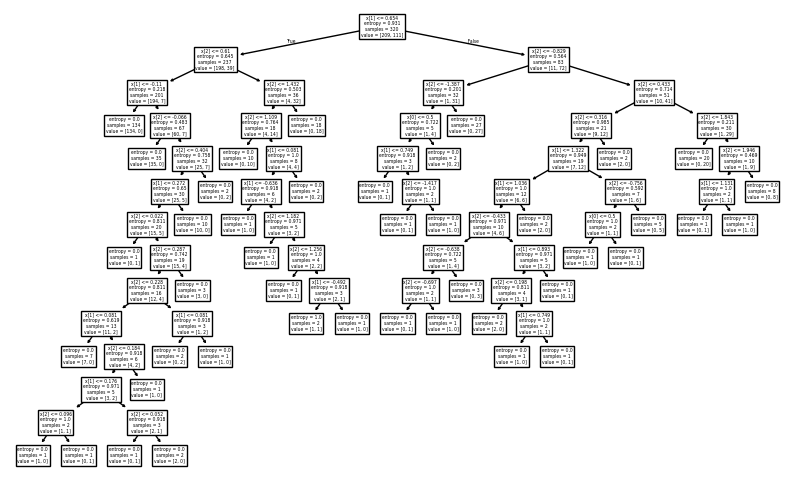

In [31]:
### visualize the tree in terms of number/plot
from sklearn import tree
import matplotlib.pyplot as plt
txt_represent = tree.export_text(classifier)
print(txt_represent)
fig = plt.figure(figsize=(10,6))
_=tree.plot_tree((classifier))
plt.show()

In [33]:
#RANDOM FOREST
accuracy_scores = []

from sklearn.ensemble import RandomForestClassifier
# criteria :
classifier = RandomForestClassifier(criterion="entropy",n_estimators=200, random_state=1)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

# Model evaluation, we compare y_pred with y_test
# to understand how well the model has performed
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[40  8]
 [ 3 29]]


In [35]:
acc = accuracy_score(y_test, y_pred)
accuracy_scores.append(acc)
print("Accuracy score: ",acc)
print("Precision score: ",precision_score(y_test, y_pred))
print("Recall score: ",recall_score(y_test, y_pred))

Accuracy score:  0.8625
Precision score:  0.7837837837837838
Recall score:  0.90625


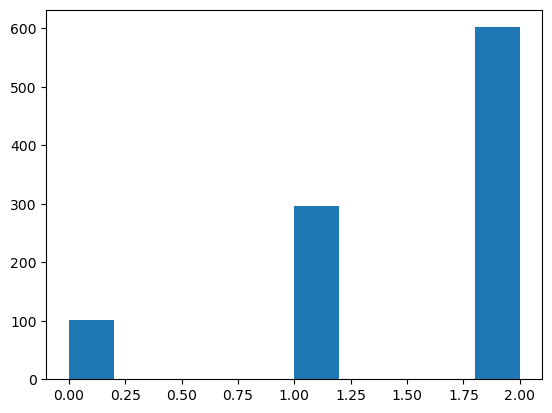

In [37]:
#Balancing the imbalanced dataset:
'''
Imbalanced dataset are those where all the classes doesnt have
same number of rows. This creates baisness in the model.
So before you perform classification, just make sure you have equal number of
rows for all the classes. If not then we need to balance it.

Balancing the dataset is called as Resampling. There are two methods:
1. Oversampling: adding more rows to the minority class (one that has less number for rows)
2. Undersampling: removing samples from majority class
We will use imblearn library to perform this:
install the library to continue working:  pip install imblearn
'''
import numpy as np
import matplotlib.pyplot as plt
#use inbuilt dataset
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
X,y = make_classification(n_samples=1000, n_features=20, n_classes=3,
                          n_clusters_per_class=1, weights=[0.1,0.3,0.6],
                          random_state=1)
plt.hist(y)
plt.show()

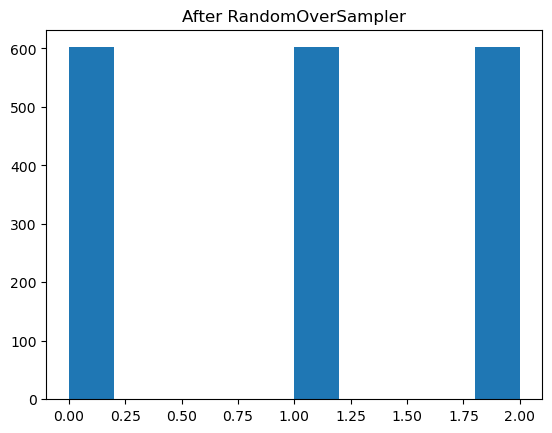

In [39]:

# Oversampling
oversample = RandomOverSampler(sampling_strategy="auto",random_state=1)
X_oversample, y_oversample= oversample.fit_resample(X,y)
plt.hist(y_oversample)
plt.title("After RandomOverSampler")
plt.show()

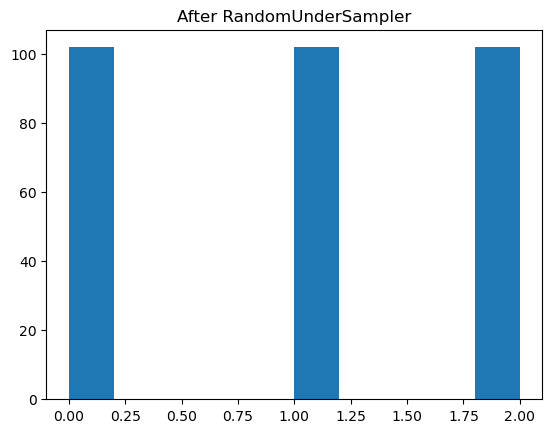

In [41]:
# undersample
undersample = RandomUnderSampler(sampling_strategy="auto",random_state=1)
X_undersample, y_undersample= undersample.fit_resample(X,y)
plt.hist(y_undersample)
plt.title("After RandomUnderSampler")
plt.show()

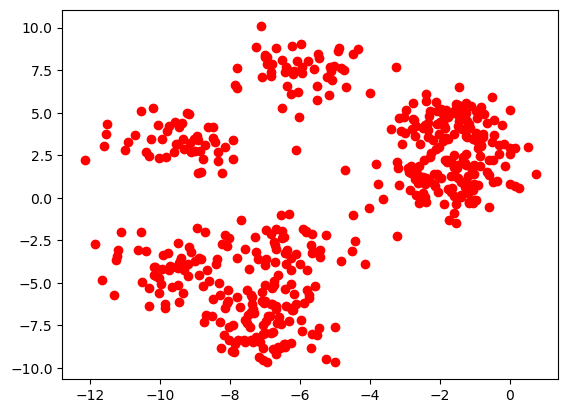

In [43]:
#CLUSTERING:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=500, n_features=2, centers=10, random_state=1)
plt.scatter(X[:,0], X[:,1],c="red")
plt.show()


In [45]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='random', max_iter=1000)
y_km = km.fit_predict(X)
print("Clusters: \n",y_km)

Clusters: 
 [0 0 0 2 1 0 0 0 1 1 1 0 2 1 0 1 2 1 2 1 1 0 1 1 2 2 1 0 2 2 1 1 1 2 1 2 1
 2 1 2 2 1 0 1 2 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 2 0 0 0 0 0 0 1 1 1 0 1 0 1
 2 0 2 1 0 0 1 1 2 0 1 1 1 1 0 0 0 2 1 0 1 1 0 0 0 0 0 0 0 1 2 1 0 1 2 2 0
 0 2 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 2 0 1 2 2 0 1 2 0 2 2 0 0 0
 0 1 1 0 1 1 1 0 2 0 1 1 0 2 1 0 0 0 2 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0
 0 1 1 0 1 1 0 0 1 1 0 1 2 2 0 0 1 1 2 0 1 0 0 1 1 2 2 0 0 1 2 2 1 1 2 2 1
 1 0 1 0 1 2 2 1 1 2 2 1 1 1 1 1 2 1 2 1 0 1 1 1 1 0 1 0 0 0 0 1 0 2 0 2 0
 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 2 1 1 1 0 0 0 0 1 1 1 2 0 2 1 1 2
 0 0 1 0 2 1 1 0 1 1 1 1 0 2 0 1 1 1 1 2 0 1 2 1 2 2 2 0 0 2 0 0 0 0 0 1 0
 0 1 2 1 0 1 2 0 0 0 2 2 2 0 0 1 2 0 0 0 1 0 2 0 1 1 0 1 0 0 0 1 2 2 0 1 0
 1 2 1 1 1 0 0 1 1 1 1 1 1 0 1 2 0 1 2 1 2 2 1 2 1 1 1 1 1 1 0 1 2 0 2 1 0
 0 1 2 1 2 0 2 1 1 0 0 2 1 0 0 1 1 0 2 2 1 2 0 0 2 1 1 0 0 1 1 0 1 0 1 1 2
 0 2 0 0 0 0 0 0 0 0 1 0 1 2 0 2 2 1 0 1 1 1 2 0 1 1 0 2 0 2 1 0 1 2 2 2 1
 1 0 1 0 1 1 

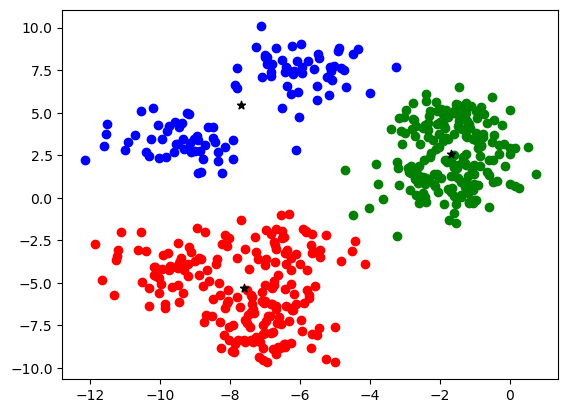

In [47]:
# now plot the segments on the graph
plt.scatter(X[y_km==0,0],
            X[y_km==0,1],c="red", label="Cluster 0")
plt.scatter(X[y_km==1,0],
            X[y_km==1,1],c="green", label="Cluster 1")
plt.scatter(X[y_km==2,0],
            X[y_km==2,1],c="blue", label="Cluster 2")
plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],c="black", marker="*", label="Centers")
plt.show()

In [55]:
###  Hierarchical Clustering
import matplotlib.pyplot as plt

link="https://raw.githubusercontent.com/swapnilsaurav/MachineLearning/refs/heads/master/USArrests.csv"
import pandas as pd
data = pd.read_csv(link)
print(data)
X = data.iloc[:,1:]
from sklearn.preprocessing import normalize
X_normalize = normalize(X)

             State  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  44.5
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  40.6
5         Colorado     7.9      204        78  38.7
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4      249        66  22.2
18          

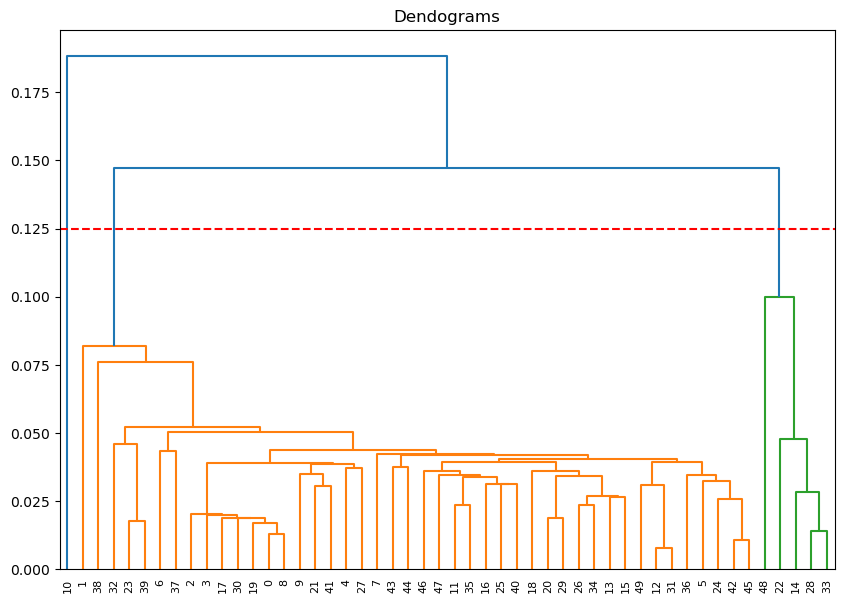

In [57]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendograms")
dendo = shc.dendrogram(shc.linkage(X_normalize))
plt.axhline(y=0.125, color="red",linestyle="--")
plt.show()

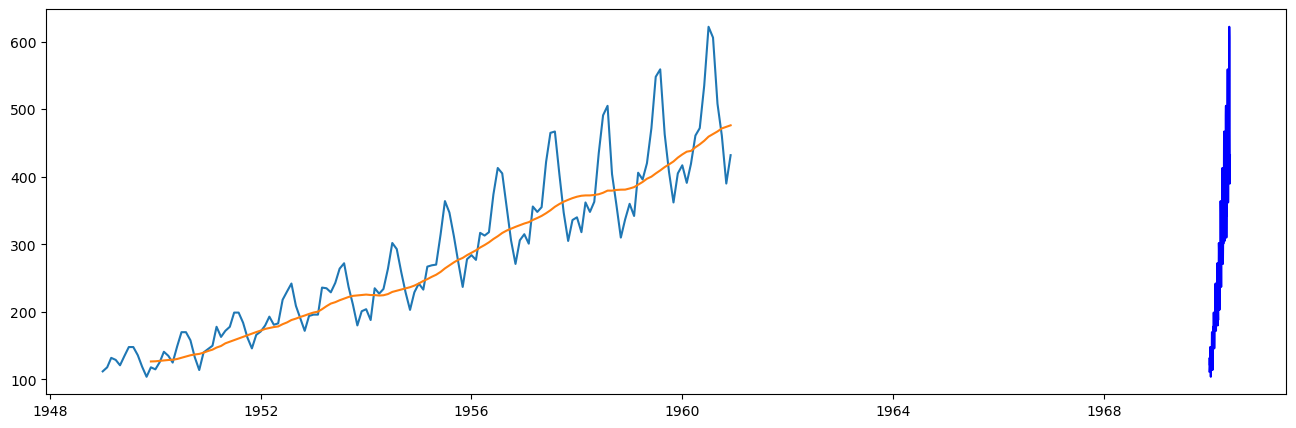

In [59]:
#TIME SERIES ANALYSIS

'''
Objective of your problem: Regression, classification, clustering or Time Series
EDA - you get to know about the data - hint on which model within the algorithm
There is no certain way to know - thats where you have:
    1. Choose all the possible model - you need to run them
    2. Make sure you select right parameters for each

'''
# Time Series Analysis
'''
Similar to Regression but the dataset will have a time component
which makes us to look at other parameters and not just the value you have.


'''
link="https://raw.githubusercontent.com/swapnilsaurav/Dataset/refs/heads/master/AirPassengers.csv"
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_tsa(df,x,y,title="",xlabel="", ylabel=""):
    plt.figure(figsize=(16,5))
    plt.plot(x,y,color="blue")
    #plt.show()

if __name__=="__main__":
    df = pd.read_csv(link)

    plot_tsa(df, x=df.index, y=df['#Passengers'],
             title="Air Passengers Travel", xlabel="Months",
             ylabel="Passengers")

    # Getting the time stamp
    df['Month'] = pd.to_datetime(df['Month'])
    df['Year'] = [dt.year for dt in df.Month]
    # set month as index for thi dataset
    data_df = df.set_index('Month', inplace=False)
    ts = data_df['#Passengers']
    ma = ts.rolling(12).mean()
    #print(df)
    plt.plot(ts)
    plt.plot(ma)
    plt.show()

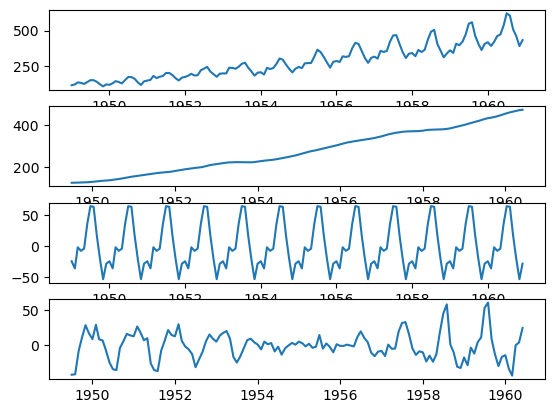

In [61]:
    # decompose the data into Trend, Seasonality and Error
    from statsmodels.tsa.seasonal import seasonal_decompose
    decom = seasonal_decompose(ts)
    trend = decom.trend
    seasonal = decom.seasonal
    error = decom.resid
    plt.subplot(411)
    plt.plot(ts, label="Original")
    plt.subplot(412)
    plt.plot(trend, label="Trend")
    plt.subplot(413)
    plt.plot(seasonal, label="Seasonal")
    plt.subplot(414)
    plt.plot(error, label="Error")
    plt.tight_layout
    plt.show()

In [67]:
'''
    Check for Stationary in Time Series:
    Checking is critical for:
    1. Model assumption: when we use specific model to make predictions,
    the assumptions can go wrong if the data is not stationary
    2. Stationary data has constant mean and variance over time hence
    model building and prediction becomes easy.
    3. Prediction becomes easier for stationary as their statistical
    properties doesnt change over time
    '''
    #from statsmodels.tsa.stattools import adfuller
    #adf_test = adfuller(ts)
    #stat_val = adf_test[0]
    #p_val = adf_test[1]
    #if p_val >0.05:
    #   print("Time series is stationary and proceed with prediction")
    #else:
    #    print("Time series is not stationary. First make it stationary before prediction")

'\n    Check for Stationary in Time Series:\n    Checking is critical for:\n    1. Model assumption: when we use specific model to make predictions,\n    the assumptions can go wrong if the data is not stationary\n    2. Stationary data has constant mean and variance over time hence\n    model building and prediction becomes easy.\n    3. Prediction becomes easier for stationary as their statistical\n    properties doesnt change over time\n    '

In [71]:
'''
    Prediction: ARIMA
    AR - Auto Regressive - p
    p = specifies number of lagged observation
    
    I - Integrated
    d - number of times to differentiate to make the data stationary
    
    MA - Moving Average
    q = number of periods for calculating moving average
    '''
    #from statsmodels.tsa.arima.model import ARIMA
    #model1 = ARIMA(ts,order=(2,1,3))
    #output = model1.fit()  # training
    #plot original data with the predicted
    #plt.plot(ts,color="blue") #original data
    #plt.plot(output.fittedvalues, color="red")
    #plt.title("Compare Pred (red) v Actual (blue)")
    #plt.show()

'\n    Prediction: ARIMA\n    AR - Auto Regressive - p\n    p = specifies number of lagged observation\n    \n    I - Integrated\n    d - number of times to differentiate to make the data stationary\n    \n    MA - Moving Average\n    q = number of periods for calculating moving average\n    '

In [75]:
# calculate RMSE for the above prediction
    #pred= output.fittedvalues
    #mse = sum((pred-ts)**2)/len(ts)
    #rmse = mse **0.5
    #print("RMSE for Model 1 = ",rmse)

In [79]:
#plot the predicted values
    #from statsmodels.graphics.tsaplots import plot_predict
    #plot_predict(start=1,end=250,result=output)
    #plt.title("Predicting for 1 to 250 months")
    #plt.show()

In [83]:
# Model 2
    #model1 = ARIMA(ts, order=(1, 1, 0))
    #output = model1.fit()  # training
    # plot original data with the predicted
    #plt.plot(ts, color="blue")  # original data
    #plt.plot(output.fittedvalues, color="red")
    #plt.title("Model 2: Compare Pred (red) v Actual (blue)")
    #plt.show()

    # calculate RMSE for the above prediction
    #pred = output.fittedvalues
    #mse = sum((pred - ts) ** 2) / len(ts)
    #rmse = mse ** 0.5
    #print("RMSE for Model 2 = ", rmse)

    # plot the predicted values
    #from statsmodels.graphics.tsaplots import plot_predict

    #plot_predict(start=1, end=250, result=output)
    #plt.title("Model 2: Predicting for 1 to 250 months")
    #plt.show()